In [2]:
import pandas as pd 

In [3]:
archivo_combinado = '../CSV/df_web_data_combinado.csv'
archivo_experimental = '../CSV/df_final_experiment_clients.csv'
archivo_demo = '../CSV/df_final_demo.csv'

df_final_web_data_combinado = pd.read_csv(archivo_combinado)
df_experiment_clients = pd.read_csv(archivo_experimental)
df_demo = pd.read_csv(archivo_demo)

df_final_web_data_combinado.head(), df_experiment_clients.head(), df_demo.head() 

(   client_id            visitor_id                      visit_id process_step  \
 0    9988021  580560515_7732621733  781255054_21935453173_531117       step_3   
 1    9988021  580560515_7732621733  781255054_21935453173_531117       step_2   
 2    9988021  580560515_7732621733  781255054_21935453173_531117       step_3   
 3    9988021  580560515_7732621733  781255054_21935453173_531117       step_2   
 4    9988021  580560515_7732621733  781255054_21935453173_531117       step_3   
 
              date_time  
 0  2017-04-17 15:27:07  
 1  2017-04-17 15:26:51  
 2  2017-04-17 15:19:22  
 3  2017-04-17 15:19:13  
 4  2017-04-17 15:18:04  ,
    client_id Variation
 0    9988021      Test
 1    8320017      Test
 2    4033851   Control
 3    1982004      Test
 4    9294070   Control,
    client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  num_accts  \
 0     836976             6.0              73.0      60.5     U        2.0   
 1    2304905             7.0              94.0 

In [4]:
# Asegurarte de que las columnas necesarias están en el DataFrame
columns = ['num_accts', 'bal', 'clnt_tenure_yr', 'clnt_tenure_mnth']
df_demo_filtered = df_demo[columns].copy()

# Crear una nueva columna para la duración total en meses
df_demo_filtered['total_tenure_months'] = df_demo_filtered['clnt_tenure_yr'] * 12 + df_demo_filtered['clnt_tenure_mnth']

# Verifica los tipos de datos
print(df_demo_filtered.info())

# Limpieza adicional si es necesario (por ejemplo, eliminar valores nulos)
df_demo_filtered = df_demo_filtered.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   num_accts            70595 non-null  float64
 1   bal                  70595 non-null  float64
 2   clnt_tenure_yr       70595 non-null  float64
 3   clnt_tenure_mnth     70595 non-null  float64
 4   total_tenure_months  70595 non-null  float64
dtypes: float64(5)
memory usage: 2.7 MB
None


In [5]:
# Cálculo de la matriz de correlación
correlation_matrix = df_demo_filtered[['num_accts', 'bal', 'total_tenure_months']].corr()

print("Matriz de correlación:")
print(correlation_matrix)

Matriz de correlación:
                     num_accts       bal  total_tenure_months
num_accts             1.000000  0.268747             0.152220
bal                   0.268747  1.000000             0.203307
total_tenure_months   0.152220  0.203307             1.000000


#Valores cercanos a 1 indican una correlación positiva fuerte.
#Valores cercanos a -1 indican una correlación negativa fuerte.
#Valores cercanos a 0 indican que no hay correlación.

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

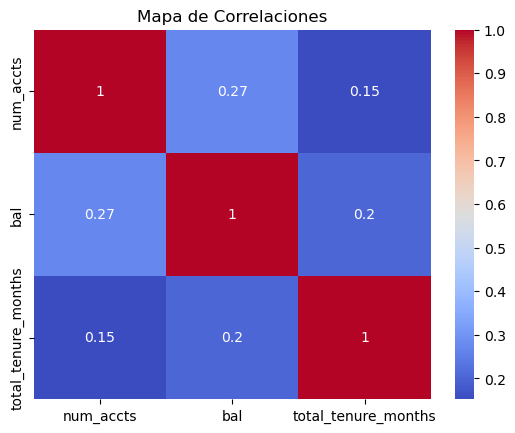

In [ ]:
# Visualización con heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Mapa de Correlaciones")
plt.show()

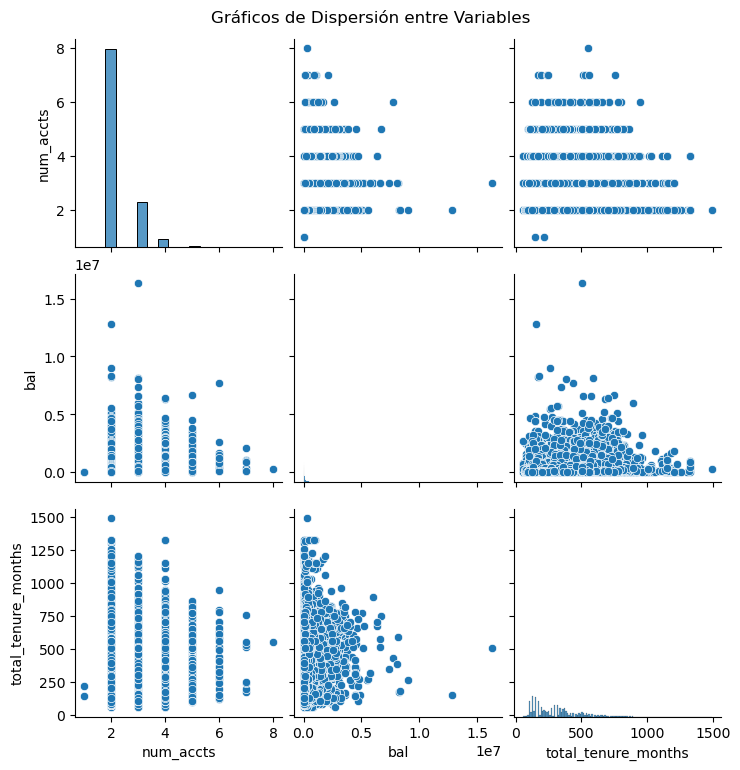

In [8]:
# Gráficos de dispersión
sns.pairplot(df_demo_filtered[['num_accts', 'bal', 'total_tenure_months']])
plt.suptitle("Gráficos de Dispersión entre Variables", y=1.02)
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [10]:
# Variables dependiente e independiente
X = df_demo_filtered[['total_tenure_months']].values
y = df_demo_filtered['bal'].values

# Modelo de regresión
model = LinearRegression()
model.fit(X, y)

# Resultados
print(f"Coeficiente de regresión: {model.coef_[0]}")
print(f"Intercepción: {model.intercept_}")

Coeficiente de regresión: 372.61880037535286
Intercepción: 37412.859207820205


In [11]:
# Realizar la combinación de los DataFrames utilizando 'client_id'
df_demo_expanded = df_demo.merge(
    df_experiment_clients[['client_id', 'Variation']],  # Seleccionamos solo 'client_id' y 'Variation'
    on='client_id',  # La clave para la combinación
    how='left'  # Hacemos un 'left join' para conservar todos los registros de df_demo
)

# Verifica la combinación
print(df_demo_expanded.head())

   client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  num_accts  \
0     836976             6.0              73.0      60.5     U        2.0   
1    2304905             7.0              94.0      58.0     U        2.0   
2    1439522             5.0              64.0      32.0     U        2.0   
3    1562045            16.0             198.0      49.0     M        2.0   
4    5126305            12.0             145.0      33.0     F        2.0   

         bal  calls_6_mnth  logons_6_mnth Variation  
0   45105.30           6.0            9.0      Test  
1  110860.30           6.0            9.0   Control  
2   52467.79           6.0            9.0      Test  
3   67454.65           3.0            6.0      Test  
4  103671.75           0.0            3.0   Control  


In [17]:
df_demo_expanded.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control


In [18]:
# Limpiar el dataframe eliminando filas con valores nulos en las columnas relevantes
df_demo_expanded = df_demo_expanded.dropna(subset=['clnt_tenure_yr', 'clnt_tenure_mnth', 'num_accts', 'bal'])

# Asegurémonos de que los valores de Variation sean consistentes (sin espacios ni mayúsculas)
df_demo_expanded['Variation'] = df_demo_expanded['Variation'].str.strip().str.lower()

# Crear la columna 'total_tenure_months' que será la suma de años y meses convertidos a meses
df_demo_expanded['total_tenure_months'] = df_demo_expanded['clnt_tenure_yr'] * 12 + df_demo_expanded['clnt_tenure_mnth']

# Separar los datos por grupo de prueba y control
control_data = df_demo_expanded[df_demo_expanded['Variation'] == 'control']
test_data = df_demo_expanded[df_demo_expanded['Variation'] == 'test']

# Verificar cuántos registros tiene cada grupo
print(f'Número de registros en el grupo de control: {len(control_data)}')
print(f'Número de registros en el grupo de test: {len(test_data)}')

# Calcular la correlación para el grupo de control
control_corr = control_data[['num_accts', 'bal', 'total_tenure_months']].corr()

# Calcular la correlación para el grupo de test
test_corr = test_data[['num_accts', 'bal', 'total_tenure_months']].corr()

# Mostrar los resultados
print("Correlaciones en el grupo de control:")
print(control_corr)

print("\nCorrelaciones en el grupo de test:")
print(test_corr)


Número de registros en el grupo de control: 23527
Número de registros en el grupo de test: 26961
Correlaciones en el grupo de control:
                     num_accts       bal  total_tenure_months
num_accts             1.000000  0.276809             0.148631
bal                   0.276809  1.000000             0.213581
total_tenure_months   0.148631  0.213581             1.000000

Correlaciones en el grupo de test:
                     num_accts       bal  total_tenure_months
num_accts             1.000000  0.256786             0.148149
bal                   0.256786  1.000000             0.196635
total_tenure_months   0.148149  0.196635             1.000000


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

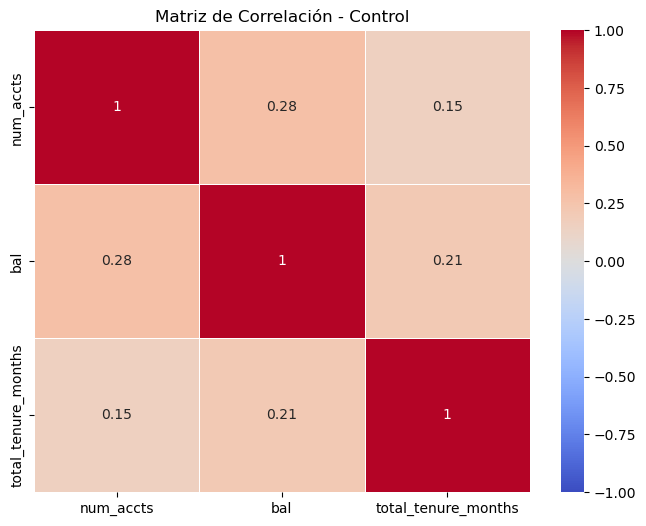

In [32]:
# Gráfico 1: Matriz de correlación para el grupo de control
plt.figure(figsize=(8, 6))
sns.heatmap(control_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title("Matriz de Correlación - Control")
plt.show()

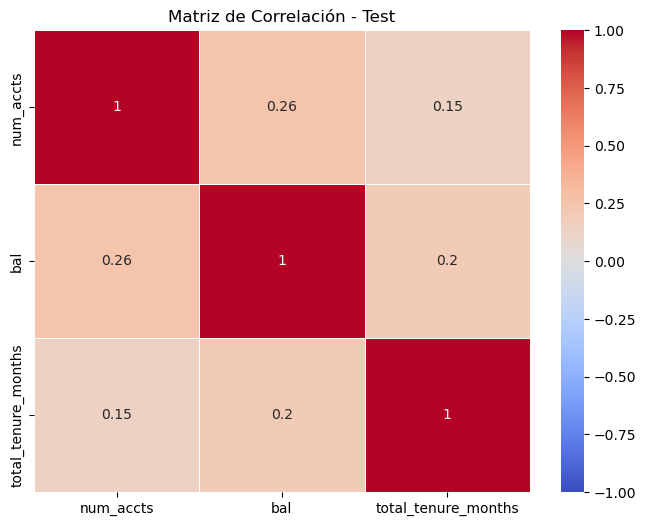

In [31]:
# Gráfico 2: Matriz de correlación para el grupo de test
plt.figure(figsize=(8, 6))
sns.heatmap(test_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title("Matriz de Correlación - Test")
plt.show()

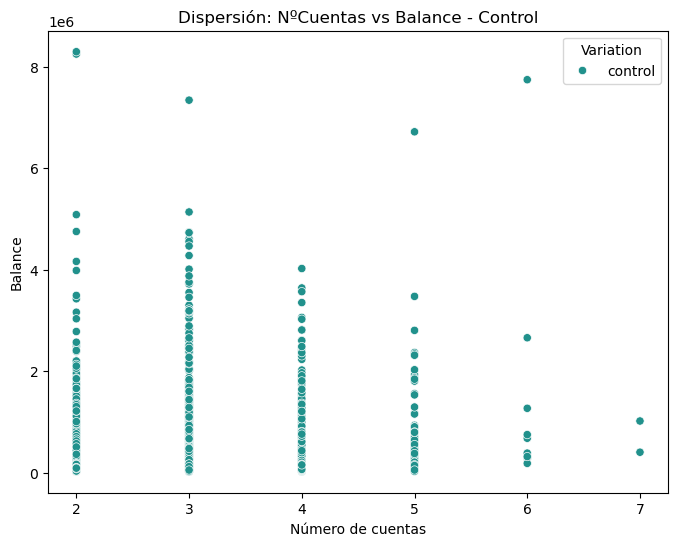

In [ ]:
# Gráfico 3: Diagrama de dispersión de número de cuentas por el balance en el grupo de control
plt.figure(figsize=(8, 6))
sns.scatterplot(data=control_data, x='num_accts', y='bal', hue='Variation', palette='viridis')
plt.title("Dispersión: NºCuentas vs Balance - Control")
plt.xlabel("Número de cuentas")
plt.ylabel("Balance")
plt.show()

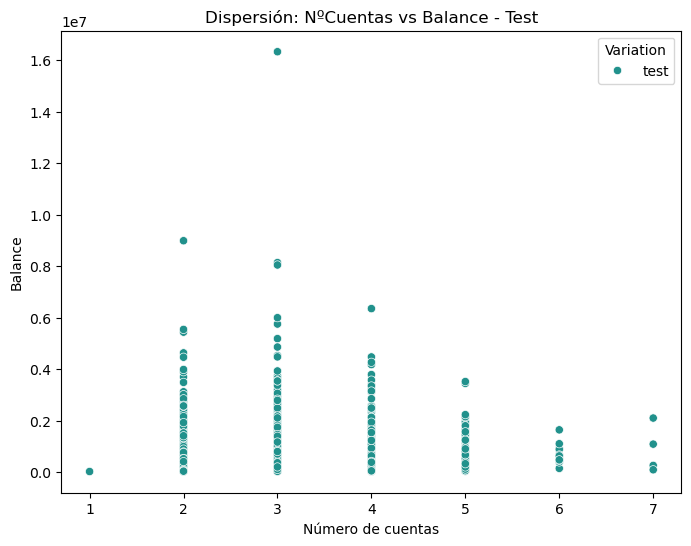

In [ ]:
# Gráfico 4: Diagrama de dispersión de número de cuentas por el balance en el grupo de test
plt.figure(figsize=(8, 6))
sns.scatterplot(data=test_data, x='num_accts', y='bal', hue='Variation', palette='viridis')
plt.title("Dispersión: NºCuentas vs Balance - Test")
plt.xlabel("Número de cuentas")
plt.ylabel("Balance")
plt.show()

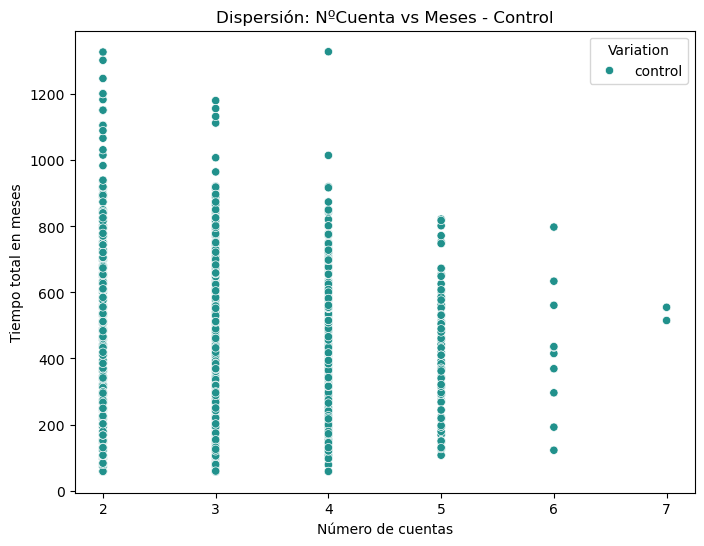

In [ ]:
# Gráfico 5: Diagrama de dispersión de número de cuentas por los meses en el grupo de control
plt.figure(figsize=(8, 6))
sns.scatterplot(data=control_data, x='num_accts', y='total_tenure_months', hue='Variation', palette='viridis')
plt.title("Dispersión: NºCuenta vs Meses - Control")
plt.xlabel("Número de cuentas")
plt.ylabel("Tiempo total en meses")
plt.show()

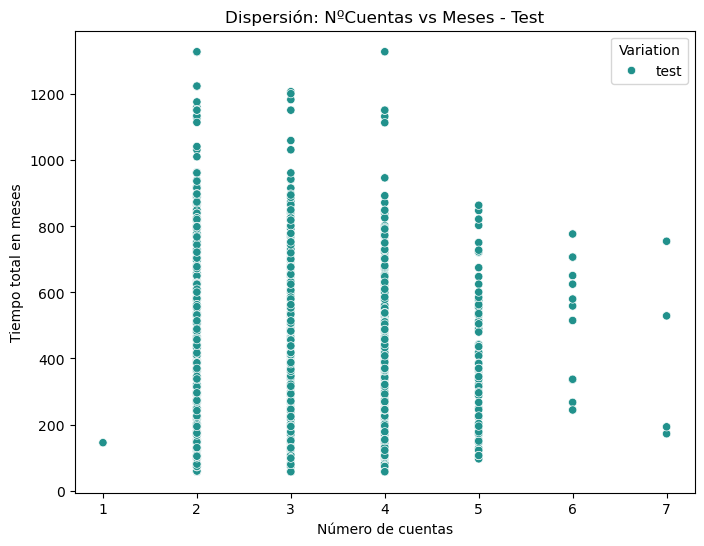

In [30]:
# Gráfico 6: Diagrama de dispersión de número de cuentas por los meses en el grupo de test
plt.figure(figsize=(8, 6))
sns.scatterplot(data=test_data, x='num_accts', y='total_tenure_months', hue='Variation', palette='viridis')
plt.title("Dispersión: NºCuentas vs Meses - Test")
plt.xlabel("Número de cuentas")
plt.ylabel("Tiempo total en meses")
plt.show()

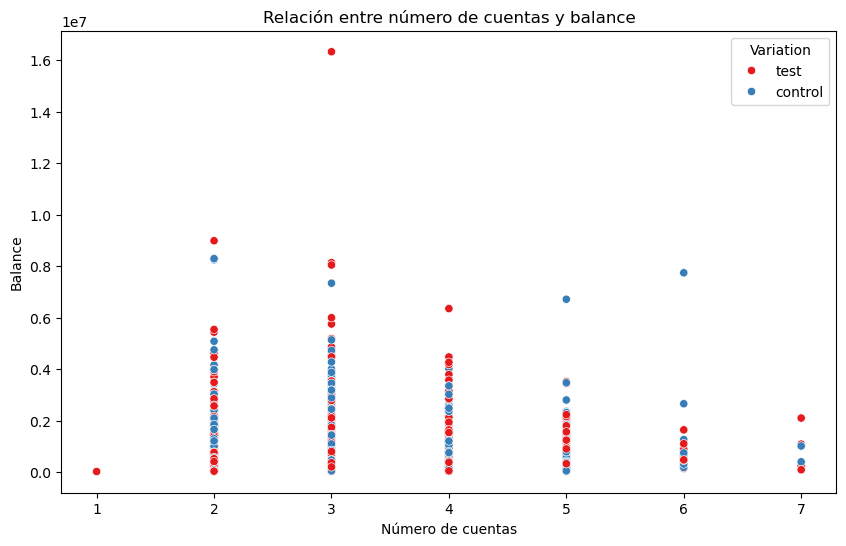

In [33]:
# Diagrama de dispersión num_accts vs bal
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_demo_expanded, x='num_accts', y='bal', hue='Variation', palette='Set1')
plt.title('Relación entre número de cuentas y balance')
plt.xlabel('Número de cuentas')
plt.ylabel('Balance')
plt.show()


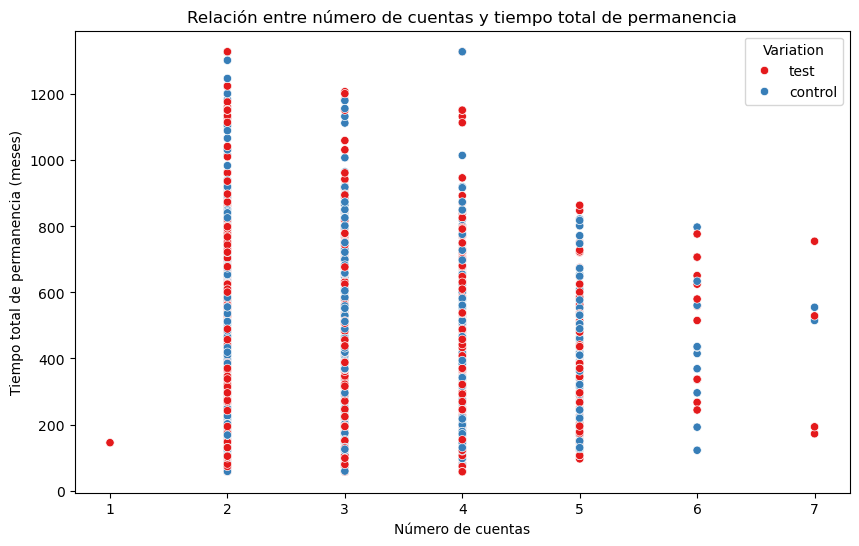

In [34]:
# Diagrama de dispersión num_accts vs total_tenure_months
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_demo_expanded, x='num_accts', y='total_tenure_months', hue='Variation', palette='Set1')
plt.title('Relación entre número de cuentas y tiempo total de permanencia')
plt.xlabel('Número de cuentas')
plt.ylabel('Tiempo total de permanencia (meses)')
plt.show()


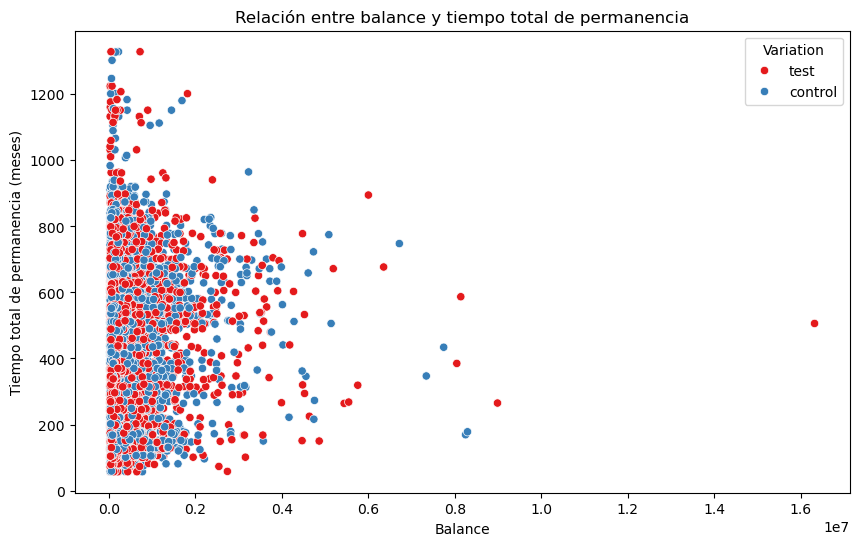

In [35]:
# Diagrama de dispersión bal vs total_tenure_months
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_demo_expanded, x='bal', y='total_tenure_months', hue='Variation', palette='Set1')
plt.title('Relación entre balance y tiempo total de permanencia')
plt.xlabel('Balance')
plt.ylabel('Tiempo total de permanencia (meses)')
plt.show()

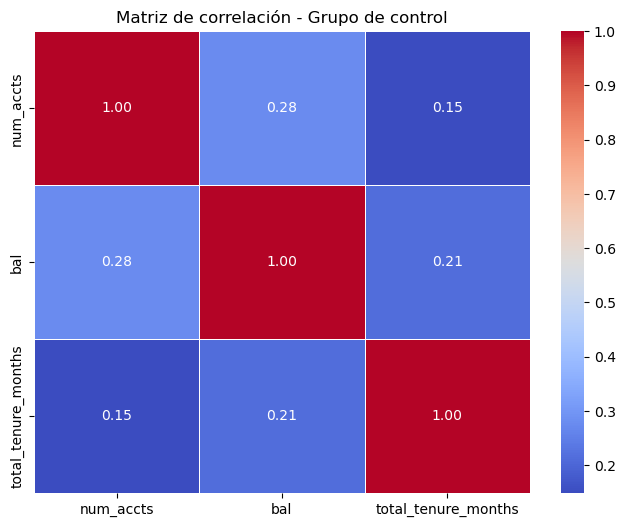

In [36]:
# Correlación para control
plt.figure(figsize=(8, 6))
control_corr = control_data[['num_accts', 'bal', 'total_tenure_months']].corr()
sns.heatmap(control_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de correlación - Grupo de control')
plt.show()

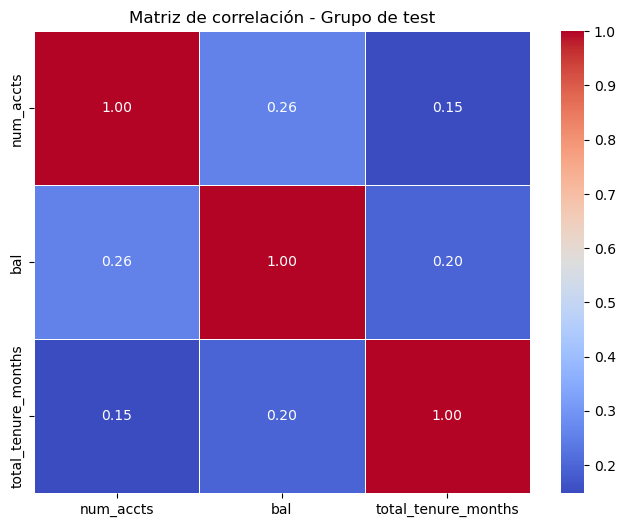

In [37]:
# Correlación para test
plt.figure(figsize=(8, 6))
test_corr = test_data[['num_accts', 'bal', 'total_tenure_months']].corr()
sns.heatmap(test_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de correlación - Grupo de test')
plt.show()

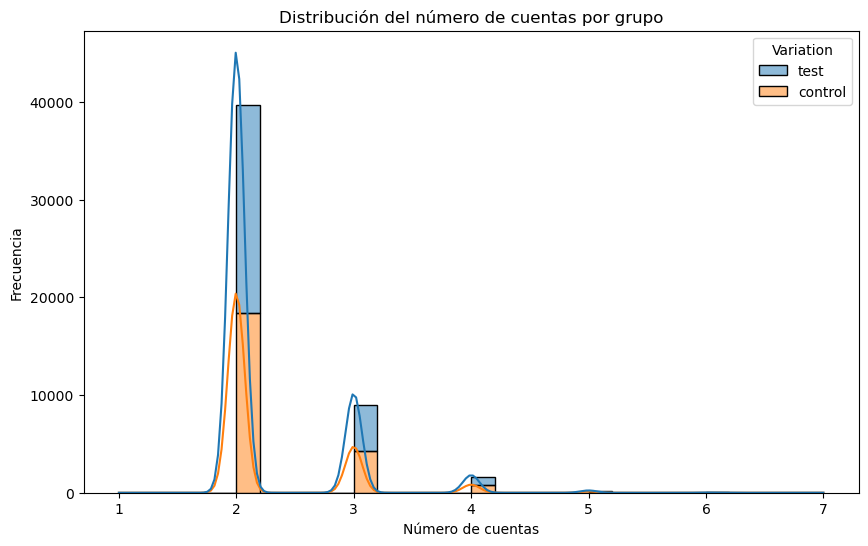

In [38]:
# Histograma de num_accts por grupo
plt.figure(figsize=(10, 6))
sns.histplot(df_demo_expanded, x='num_accts', hue='Variation', multiple='stack', kde=True, bins=30)
plt.title('Distribución del número de cuentas por grupo')
plt.xlabel('Número de cuentas')
plt.ylabel('Frecuencia')
plt.show()

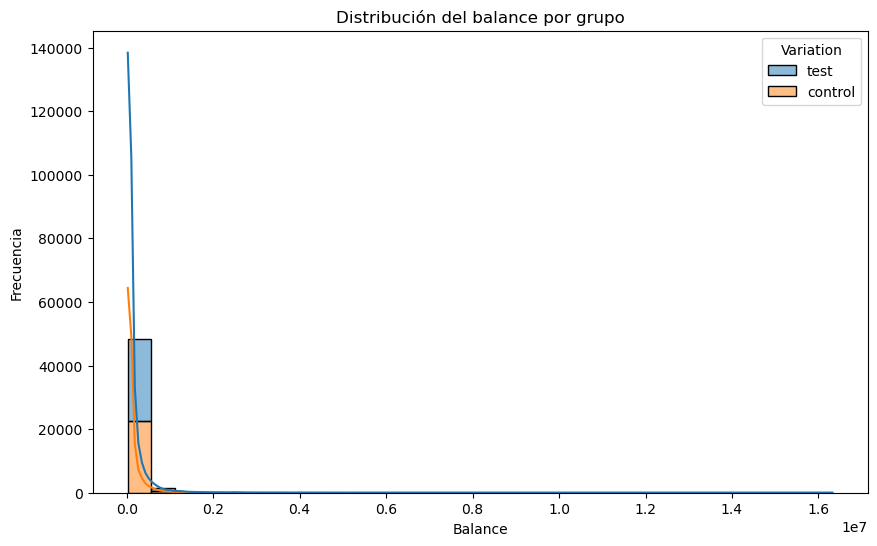

In [39]:
# Histograma de bal por grupo
plt.figure(figsize=(10, 6))
sns.histplot(df_demo_expanded, x='bal', hue='Variation', multiple='stack', kde=True, bins=30)
plt.title('Distribución del balance por grupo')
plt.xlabel('Balance')
plt.ylabel('Frecuencia')
plt.show()

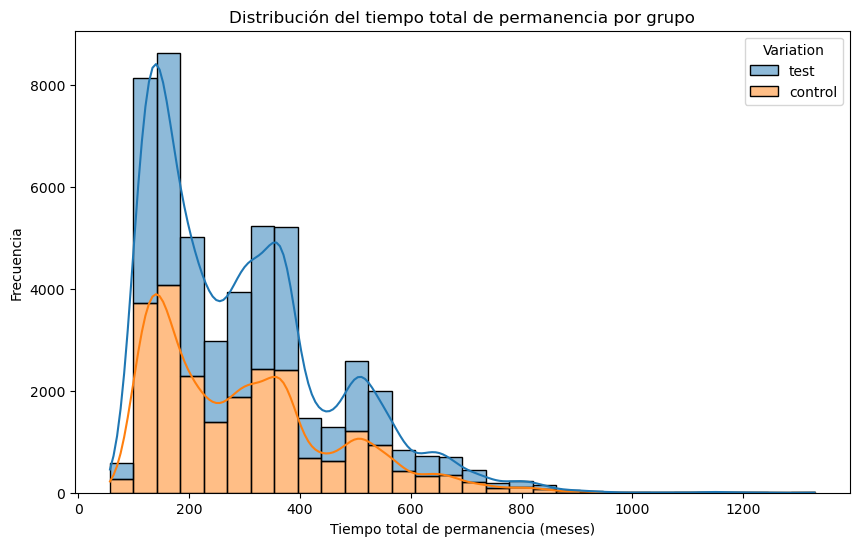

In [40]:
# Histograma de total_tenure_months por grupo
plt.figure(figsize=(10, 6))
sns.histplot(df_demo_expanded, x='total_tenure_months', hue='Variation', multiple='stack', kde=True, bins=30)
plt.title('Distribución del tiempo total de permanencia por grupo')
plt.xlabel('Tiempo total de permanencia (meses)')
plt.ylabel('Frecuencia')
plt.show()

C:\Users\Gema\AppData\Local\Temp\ipykernel_17804\3579823866.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_demo_expanded, x='Variation', y='num_accts', palette='Set1')


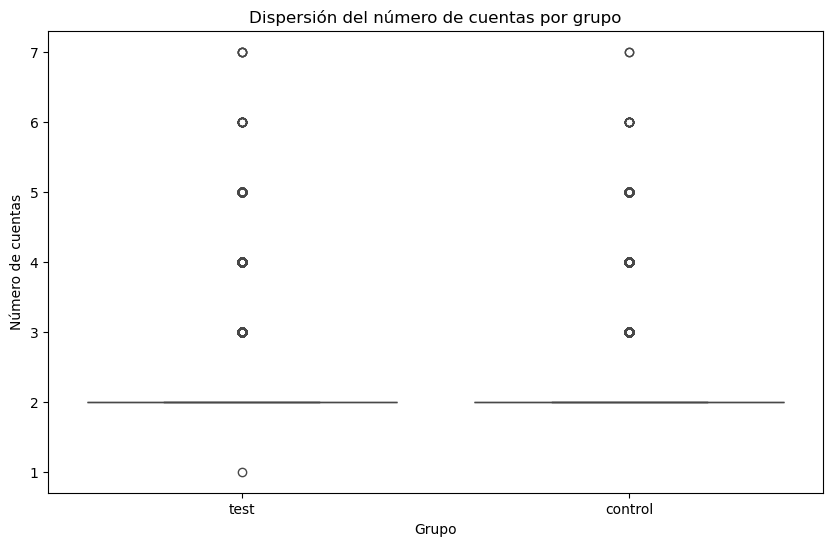

In [41]:
# Boxplot de num_accts por grupo
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_demo_expanded, x='Variation', y='num_accts', palette='Set1')
plt.title('Dispersión del número de cuentas por grupo')
plt.xlabel('Grupo')
plt.ylabel('Número de cuentas')
plt.show()

C:\Users\Gema\AppData\Local\Temp\ipykernel_17804\3012201157.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_demo_expanded, x='Variation', y='bal', palette='Set1')


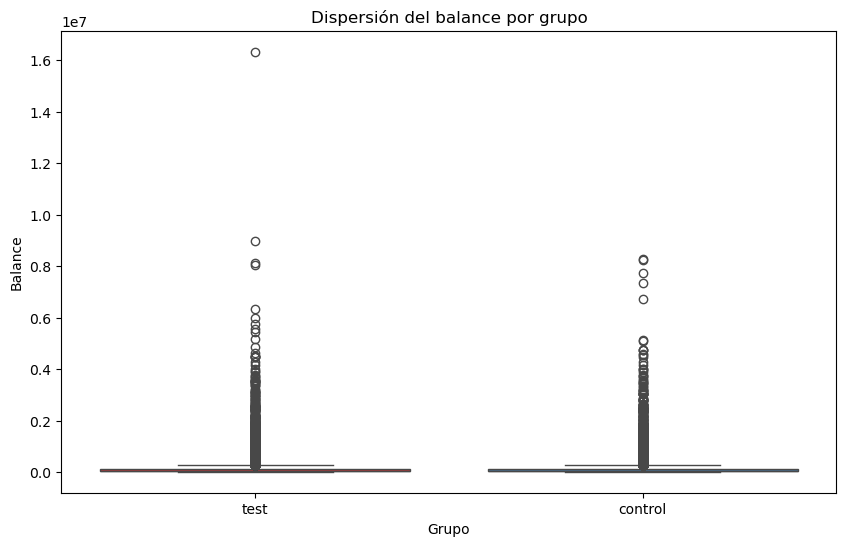

In [42]:
# Boxplot de bal por grupo
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_demo_expanded, x='Variation', y='bal', palette='Set1')
plt.title('Dispersión del balance por grupo')
plt.xlabel('Grupo')
plt.ylabel('Balance')
plt.show()

C:\Users\Gema\AppData\Local\Temp\ipykernel_17804\3297236817.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_demo_expanded, x='Variation', y='total_tenure_months', palette='Set1')


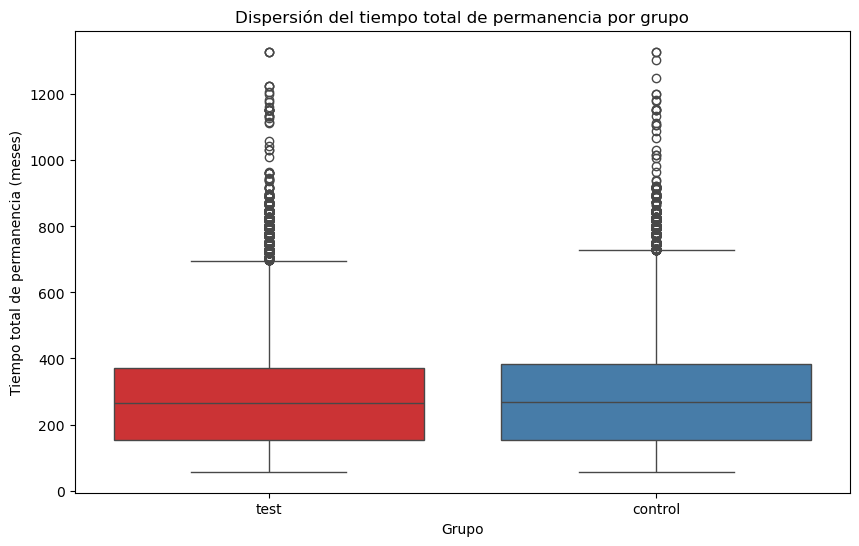

In [43]:
# Boxplot de total_tenure_months por grupo
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_demo_expanded, x='Variation', y='total_tenure_months', palette='Set1')
plt.title('Dispersión del tiempo total de permanencia por grupo')
plt.xlabel('Grupo')
plt.ylabel('Tiempo total de permanencia (meses)')
plt.show()

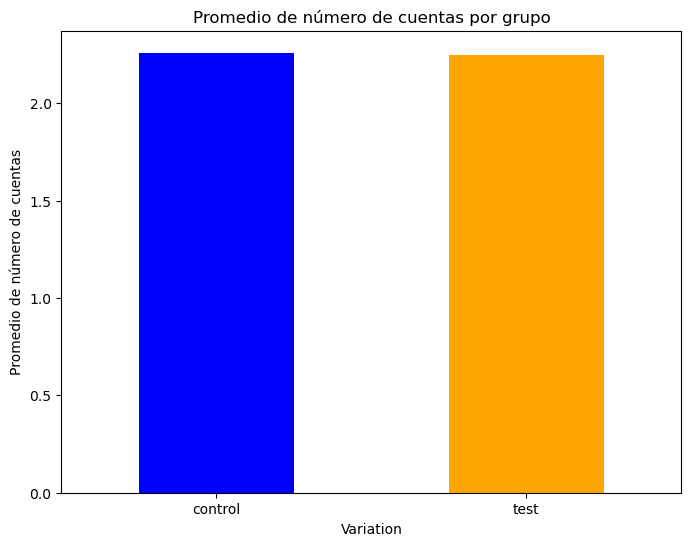

In [44]:
# Promedio de num_accts por grupo
avg_num_accts = df_demo_expanded.groupby('Variation')['num_accts'].mean()
avg_num_accts.plot(kind='bar', figsize=(8, 6), color=['blue', 'orange'])
plt.title('Promedio de número de cuentas por grupo')
plt.ylabel('Promedio de número de cuentas')
plt.xticks(rotation=0)
plt.show()

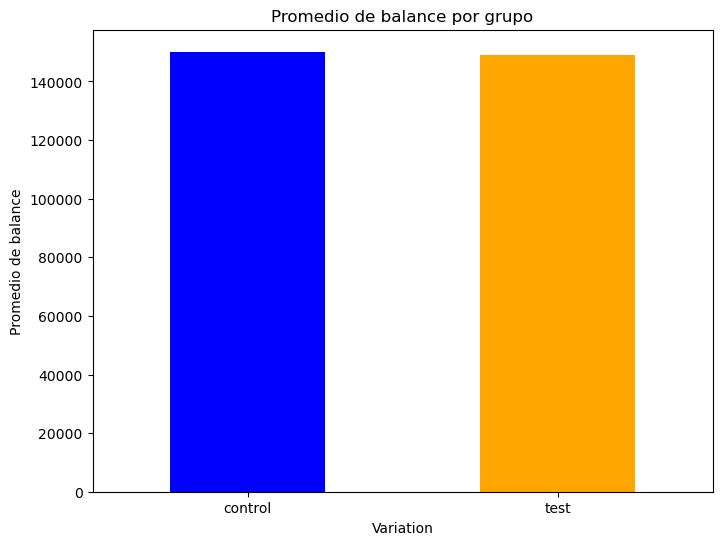

In [45]:
avg_bal = df_demo_expanded.groupby('Variation')['bal'].mean()
avg_bal.plot(kind='bar', figsize=(8, 6), color=['blue', 'orange'])
plt.title('Promedio de balance por grupo')
plt.ylabel('Promedio de balance')
plt.xticks(rotation=0)
plt.show()

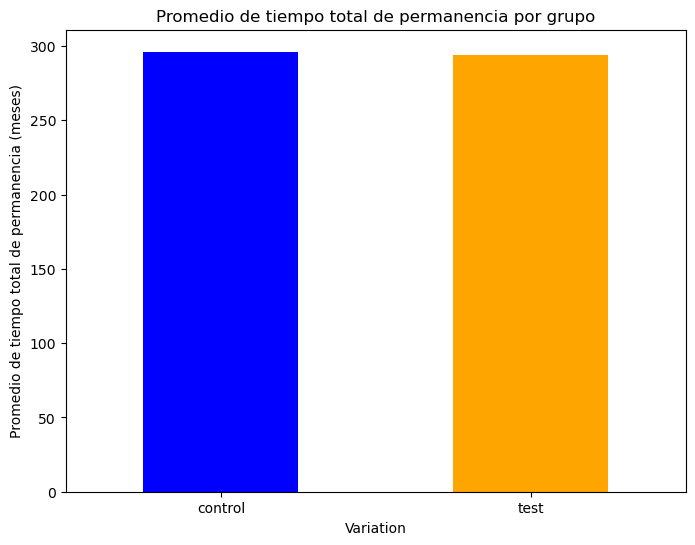

In [46]:
avg_tenure = df_demo_expanded.groupby('Variation')['total_tenure_months'].mean()
avg_tenure.plot(kind='bar', figsize=(8, 6), color=['blue', 'orange'])
plt.title('Promedio de tiempo total de permanencia por grupo')
plt.ylabel('Promedio de tiempo total de permanencia (meses)')
plt.xticks(rotation=0)
plt.show()

In [47]:
# Función para detectar outliers usando el IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detectar outliers en 'num_accts' y 'bal'
outliers_num_accts = detect_outliers(df_demo_expanded, 'num_accts')
outliers_bal = detect_outliers(df_demo_expanded, 'bal')

print(f"Outliers en 'num_accts':")
print(outliers_num_accts)
print(f"Outliers en 'bal':")
print(outliers_bal)

Outliers en 'num_accts':
       client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  num_accts  \
7         388801            30.0             361.0      57.5     M        5.0   
13       2214073            16.0             193.0      62.5     M        3.0   
21       6590646             8.0             103.0      42.5     F        3.0   
22       7585111             5.0              70.0      42.0     U        3.0   
23       3638336            12.0             152.0      30.5     M        3.0   
...          ...             ...               ...       ...   ...        ...   
70589    5624770             5.0              68.0      21.0     U        3.0   
70592    4277747            12.0             155.0      40.0     M        3.0   
70604    7993686             4.0              56.0      38.5     U        3.0   
70607    1573142            21.0             255.0      68.0     M        3.0   
70608    5602139            21.0             254.0      59.5     F        3.0   

  

In [49]:
from scipy.stats import zscore

In [50]:
# Calcular Z-scores para las variables
df_demo_expanded['zscore_num_accts'] = zscore(df_demo_expanded['num_accts'])
df_demo_expanded['zscore_bal'] = zscore(df_demo_expanded['bal'])

# Filtrar valores atípicos con Z-score mayor que 3 o menor que -3
outliers_zscore_num_accts = df_demo_expanded[df_demo_expanded['zscore_num_accts'].abs() > 3]
outliers_zscore_bal = df_demo_expanded[df_demo_expanded['zscore_bal'].abs() > 3]

print(f"Outliers en 'num_accts' (Z-score):")
print(outliers_zscore_num_accts)
print(f"Outliers en 'bal' (Z-score):")
print(outliers_zscore_bal)

Outliers en 'num_accts' (Z-score):
       client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  num_accts  \
7         388801            30.0             361.0      57.5     M        5.0   
86       1460648            24.0             288.0      40.5     F        5.0   
133      5115750            22.0             271.0      62.0     F        4.0   
189       976546            19.0             229.0      38.5     M        4.0   
210       425532             5.0              67.0      42.0     U        4.0   
...          ...             ...               ...       ...   ...        ...   
70467    4566250            12.0             144.0      29.0     M        4.0   
70505    9536092             5.0              71.0      26.5     U        4.0   
70508    8367317             7.0              88.0      22.5     M        4.0   
70521    6385793            17.0             210.0      37.0     M        4.0   
70581    2184810            23.0             286.0      75.5     M        

In [51]:
# Crear grupos de edad (por ejemplo, rangos de 10 años)
df_demo_expanded['age_group'] = pd.cut(df_demo_expanded['clnt_age'], bins=[18, 30, 40, 50, 60, 100], labels=['18-30', '31-40', '41-50', '51-60', '60+'])

# Correlación por grupo de edad
age_groups = df_demo_expanded['age_group'].unique()
for group in age_groups:
    group_data = df_demo_expanded[df_demo_expanded['age_group'] == group]
    group_corr = group_data[['num_accts', 'bal', 'total_tenure_months']].corr()
    print(f"Correlaciones para el grupo de edad {group}:")
    print(group_corr)
    print("\n")

Correlaciones para el grupo de edad 60+:
                     num_accts       bal  total_tenure_months
num_accts             1.000000  0.328377             0.228102
bal                   0.328377  1.000000             0.152624
total_tenure_months   0.228102  0.152624             1.000000


Correlaciones para el grupo de edad 51-60:
                     num_accts       bal  total_tenure_months
num_accts             1.000000  0.313942             0.227614
bal                   0.313942  1.000000             0.185933
total_tenure_months   0.227614  0.185933             1.000000


Correlaciones para el grupo de edad 31-40:
                     num_accts       bal  total_tenure_months
num_accts             1.000000  0.304297             0.094667
bal                   0.304297  1.000000             0.121801
total_tenure_months   0.094667  0.121801             1.000000


Correlaciones para el grupo de edad 41-50:
                     num_accts       bal  total_tenure_months
num_accts         

In [52]:
# Correlación por género
gender_groups = df_demo_expanded['gendr'].unique()
for gender in gender_groups:
    gender_data = df_demo_expanded[df_demo_expanded['gendr'] == gender]
    gender_corr = gender_data[['num_accts', 'bal', 'total_tenure_months']].corr()
    print(f"Correlaciones para el género {gender}:")
    print(gender_corr)
    print("\n")

Correlaciones para el género U:
                     num_accts       bal  total_tenure_months
num_accts             1.000000  0.198092             0.056013
bal                   0.198092  1.000000             0.136685
total_tenure_months   0.056013  0.136685             1.000000


Correlaciones para el género M:
                     num_accts       bal  total_tenure_months
num_accts             1.000000  0.292929             0.196986
bal                   0.292929  1.000000             0.178358
total_tenure_months   0.196986  0.178358             1.000000


Correlaciones para el género F:
                     num_accts       bal  total_tenure_months
num_accts             1.000000  0.262813             0.128899
bal                   0.262813  1.000000             0.160974
total_tenure_months   0.128899  0.160974             1.000000


Correlaciones para el género X:
                     num_accts       bal  total_tenure_months
num_accts             1.000000 -0.457417            -0.54560

C:\Users\Gema\AppData\Local\Temp\ipykernel_17804\1657335414.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_demo_expanded, x='Variation', y='num_accts', palette='Set1')
C:\Users\Gema\AppData\Local\Temp\ipykernel_17804\1657335414.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_demo_expanded, x='Variation', y='bal', palette='Set1')


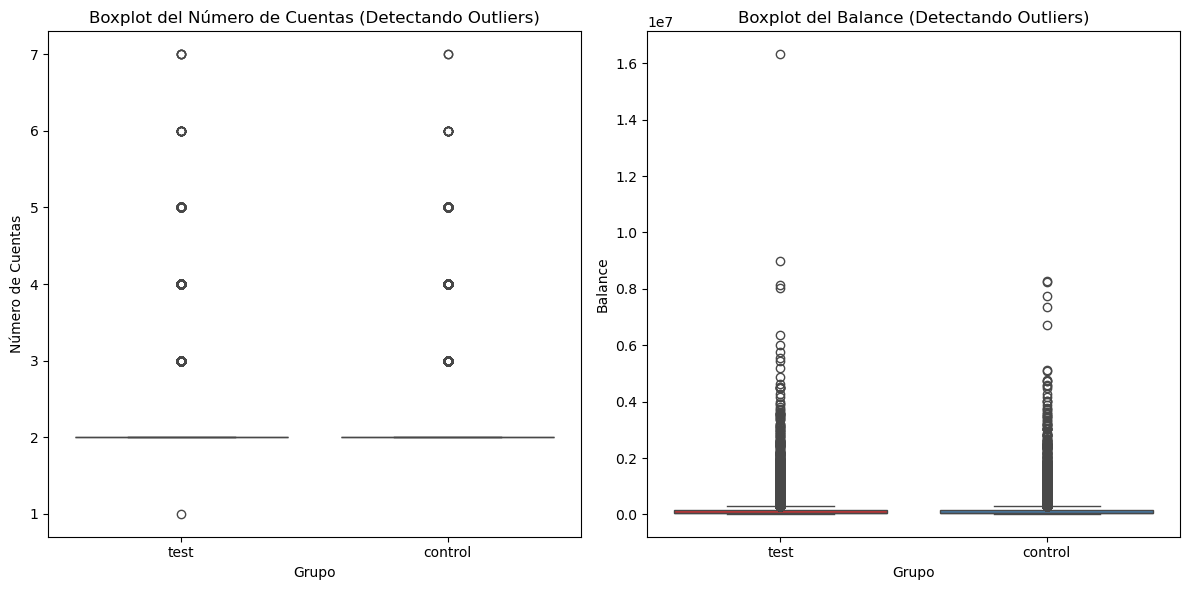

In [54]:
# Gráfico de boxplot para detectar outliers en 'num_accts' y 'bal' por grupo (Test y Control)
plt.figure(figsize=(12, 6))

# Boxplot para 'num_accts'
plt.subplot(1, 2, 1)
sns.boxplot(data=df_demo_expanded, x='Variation', y='num_accts', palette='Set1')
plt.title('Boxplot del Número de Cuentas (Detectando Outliers)')
plt.xlabel('Grupo')
plt.ylabel('Número de Cuentas')

# Boxplot para 'bal'
plt.subplot(1, 2, 2)
sns.boxplot(data=df_demo_expanded, x='Variation', y='bal', palette='Set1')
plt.title('Boxplot del Balance (Detectando Outliers)')
plt.xlabel('Grupo')
plt.ylabel('Balance')

plt.tight_layout()
plt.show()

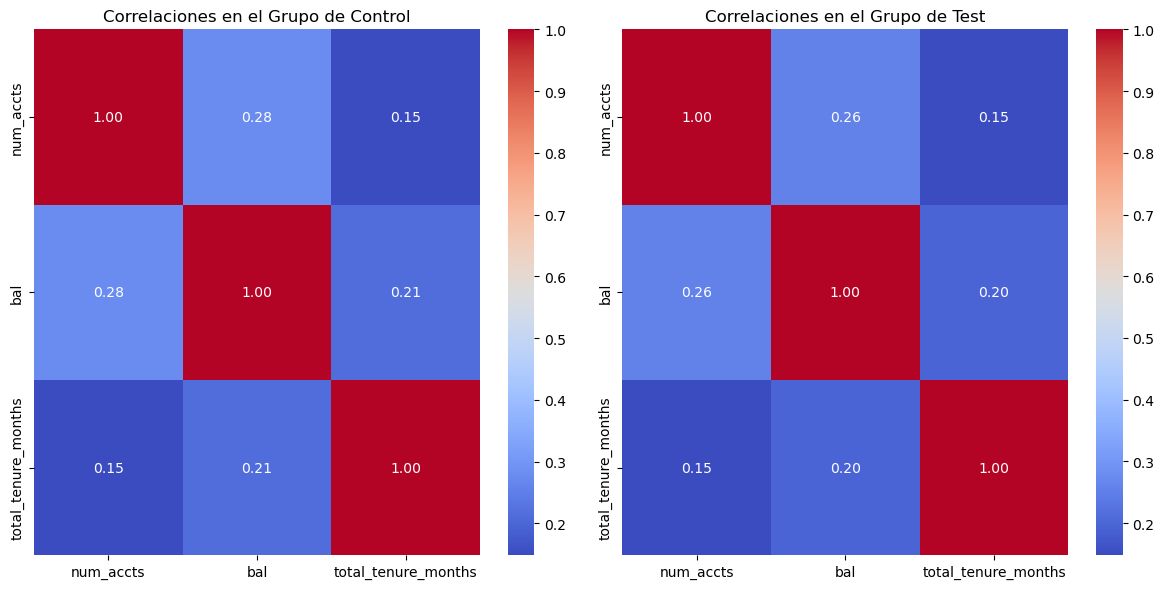

In [55]:
# Correlación en el grupo de control
control_corr = control_data[['num_accts', 'bal', 'total_tenure_months']].corr()

# Correlación en el grupo de test
test_corr = test_data[['num_accts', 'bal', 'total_tenure_months']].corr()

# Gráfico de Heatmap para correlaciones
plt.figure(figsize=(12, 6))

# Correlación del grupo de control
plt.subplot(1, 2, 1)
sns.heatmap(control_corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlaciones en el Grupo de Control')

# Correlación del grupo de test
plt.subplot(1, 2, 2)
sns.heatmap(test_corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlaciones en el Grupo de Test')

plt.tight_layout()
plt.show()

c:\Users\Gema\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\Gema\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


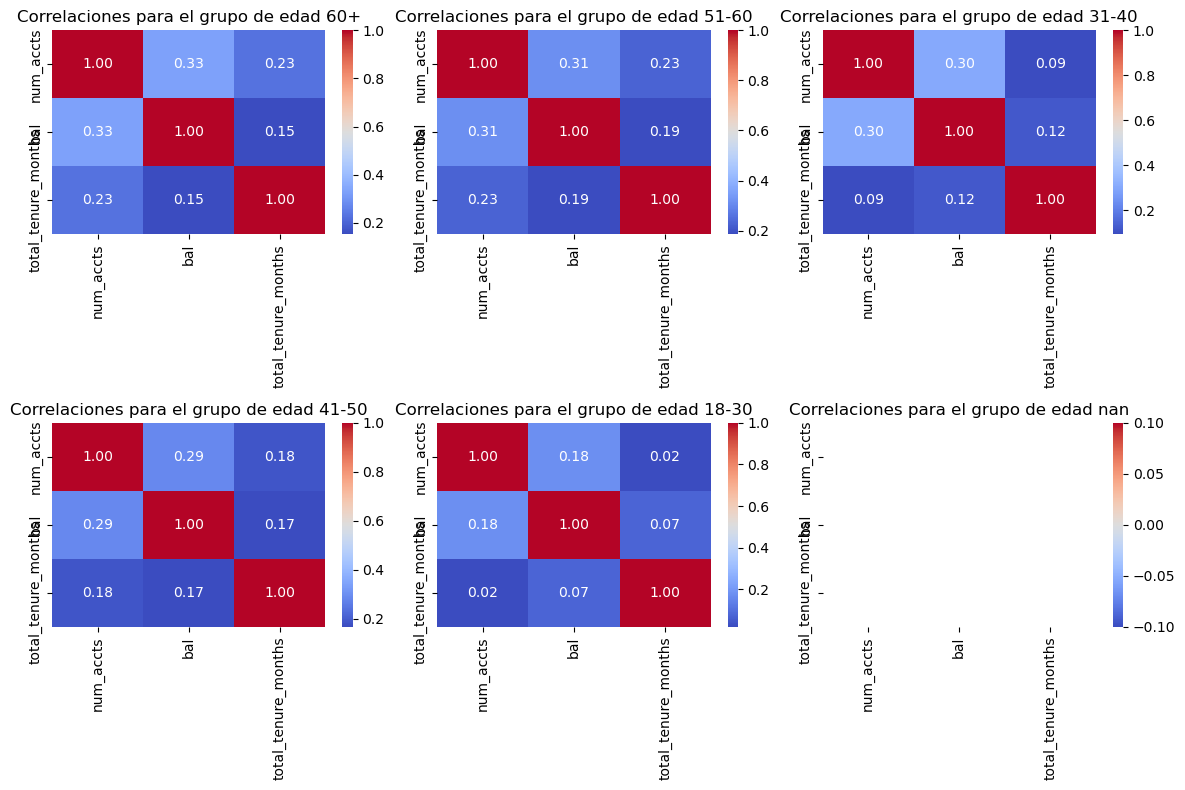

In [56]:
# Crear grupos de edad (por ejemplo, rangos de 10 años)
df_demo_expanded['age_group'] = pd.cut(df_demo_expanded['clnt_age'], bins=[18, 30, 40, 50, 60, 100], labels=['18-30', '31-40', '41-50', '51-60', '60+'])

# Correlación por grupo de edad
plt.figure(figsize=(12, 8))
age_groups = df_demo_expanded['age_group'].unique()

for i, group in enumerate(age_groups):
    plt.subplot(2, 3, i+1)
    group_data = df_demo_expanded[df_demo_expanded['age_group'] == group]
    group_corr = group_data[['num_accts', 'bal', 'total_tenure_months']].corr()
    
    sns.heatmap(group_corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
    plt.title(f'Correlaciones para el grupo de edad {group}')

plt.tight_layout()
plt.show()


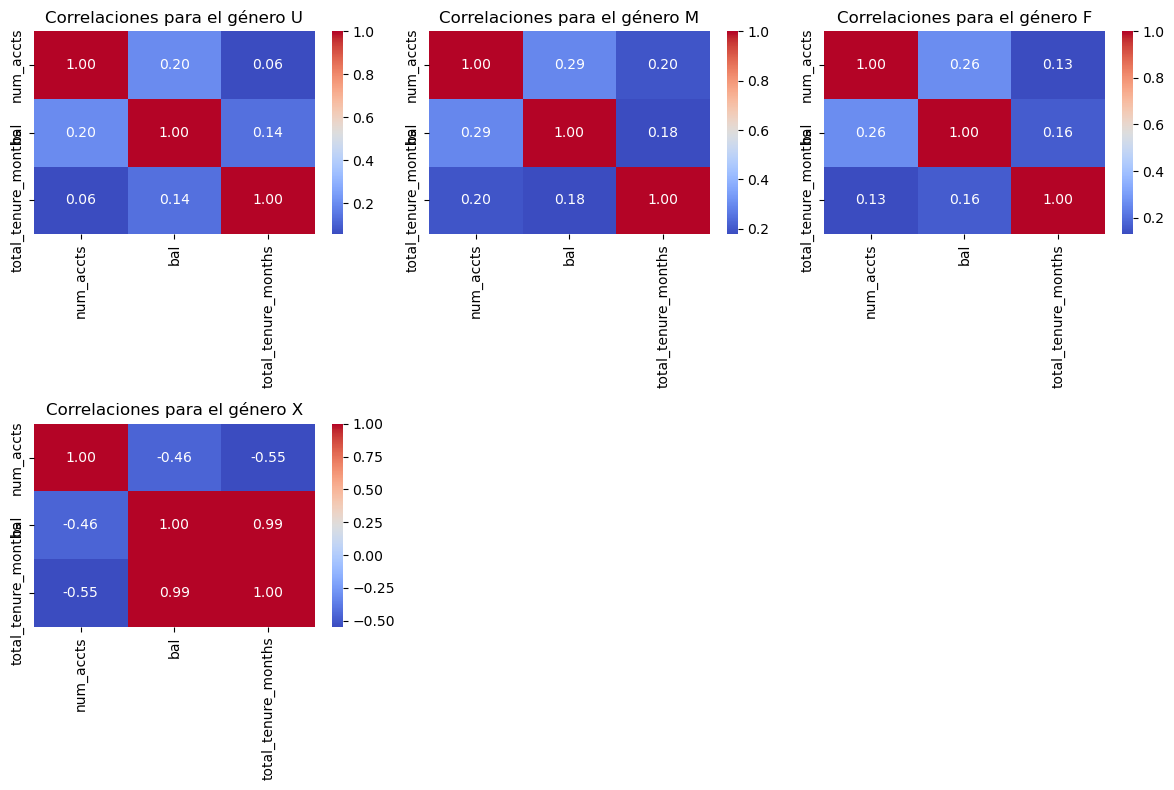

In [57]:
# Correlación por género
plt.figure(figsize=(12, 8))
gender_groups = df_demo_expanded['gendr'].unique()

for i, gender in enumerate(gender_groups):
    plt.subplot(2, 3, i+1)
    gender_data = df_demo_expanded[df_demo_expanded['gendr'] == gender]
    gender_corr = gender_data[['num_accts', 'bal', 'total_tenure_months']].corr()
    
    sns.heatmap(gender_corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
    plt.title(f'Correlaciones para el género {gender}')

plt.tight_layout()
plt.show()